In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import seaborn as sns
%matplotlib inline

In [2]:
df_predictions  = pd.read_csv("../data/rakuten_predictions_3modeles_4246articles_full_data.csv")

In [3]:
df_predictions.head()

,prdtypecode,index,designation,y_tex,y_ima,y_tex_ima
0,2905,26,Nk Pro Racing - Jeu En Téléchargement,26,26,26
1,1281,8,Exit - Tombeau Du Pharaon,5,5,8
2,2060,16,Bricolage Lettres En Mousse D'argent Alphabet ...,16,16,16
3,1280,7,Nostalgique Fer Blanc Clockwork Chaîne Jouet P...,7,7,7
4,2280,18,Le Courrier De L'unesco Mai 1996 N° 9605 : Le...,18,18,18


In [4]:
# Céation des labels pour les légendes
labels = sorted(df_predictions['prdtypecode'].unique())

# Correpondance label -> index
label2idx = {label : index for index,label in enumerate(labels)}

# Correpondance index -> label
idx2label = {index : label for index,label in enumerate(labels)}

## Predictions pour le texte seul

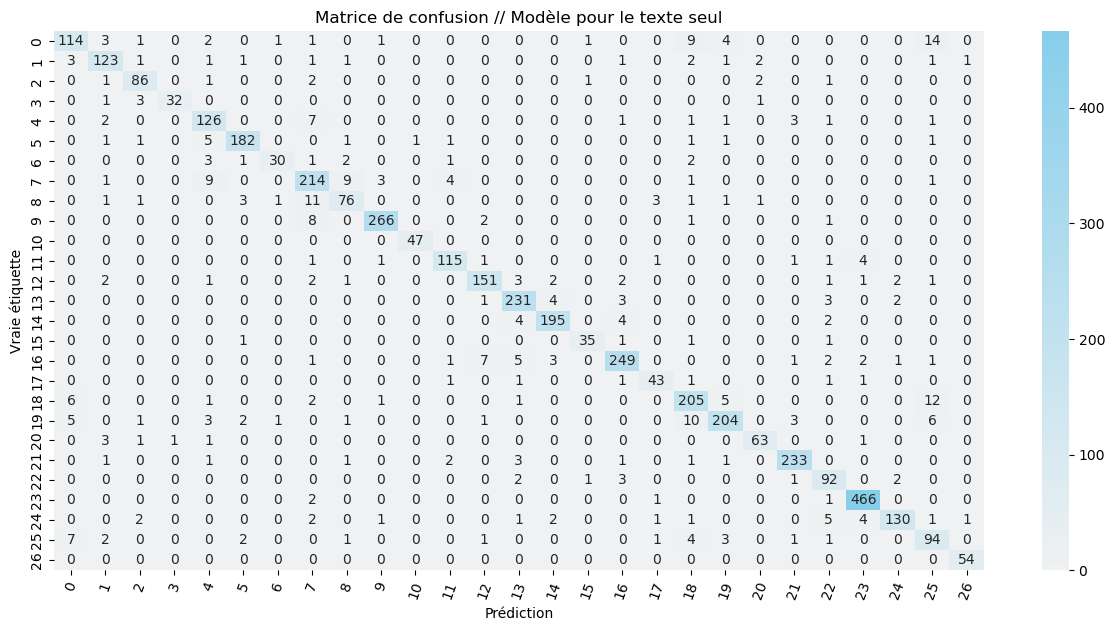

In [5]:
text_cf = confusion_matrix(df_predictions['index'], df_predictions['y_tex'])

plt.figure(figsize=(15, 7))
palette_bleu=sns.light_palette("#87CEEB", as_cmap=True)
sns.heatmap(text_cf, annot=True,  cmap=palette_bleu, fmt = 'd')
plt.title('Matrice de confusion // Modèle pour le texte seul')
plt.xlabel('Prédiction')
plt.xticks(rotation=70)
plt.ylabel('Vraie étiquette')
plt.show()

In [6]:
def get_classification_report(y_test, y_pred):
    report =classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return df_classification_report

In [7]:
df_pred_tex = get_classification_report(df_predictions['index'], df_predictions['y_tex'])

In [8]:
df_pred_tex['support']= df_pred_tex['support'].astype('int')

In [19]:
df_pred_tex

,precision,recall,f1-score,support
0,0.844444,0.754967,0.797203,151
1,0.872340,0.884892,0.878571,139
2,0.886598,0.914894,0.900524,94
3,0.969697,0.864865,0.914286,37
4,0.818182,0.881119,0.848485,143
5,0.947917,0.933333,0.940568,195
6,0.909091,0.750000,0.821918,40
7,0.839216,0.884298,0.861167,242
8,0.817204,0.767677,0.791667,99
9,0.974359,0.956835,0.965517,278


## Predictions pour l'image seule

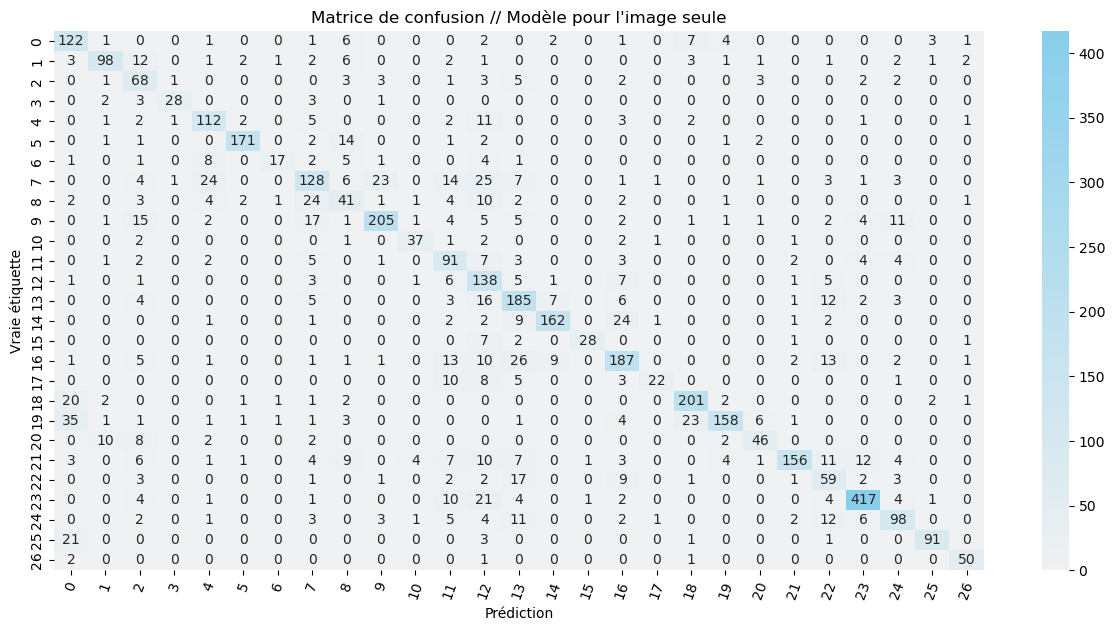

In [10]:
ima_cf = confusion_matrix(df_predictions['index'], df_predictions['y_ima'])

plt.figure(figsize=(15, 7))
palette_bleu=sns.light_palette("#87CEEB", as_cmap=True)
sns.heatmap(ima_cf, annot=True,  cmap=palette_bleu, fmt = 'd')
plt.title("Matrice de confusion // Modèle pour l'image seule")
plt.xlabel('Prédiction')
plt.xticks(rotation=70)
plt.ylabel('Vraie étiquette')
plt.show()

In [11]:
df_pred_ima = get_classification_report(df_predictions['index'], df_predictions['y_ima'])

In [12]:
df_pred_ima['support']= df_pred_ima['support'].astype('int')

In [13]:
df_pred_ima

,precision,recall,f1-score,support
0,0.578199,0.807947,0.674033,151
1,0.823529,0.705036,0.759690,139
2,0.462585,0.723404,0.564315,94
3,0.903226,0.756757,0.823529,37
4,0.691358,0.783217,0.734426,143
5,0.950000,0.876923,0.912000,195
6,0.809524,0.425000,0.557377,40
7,0.603774,0.528926,0.563877,242
8,0.418367,0.414141,0.416244,99
9,0.854167,0.737410,0.791506,278


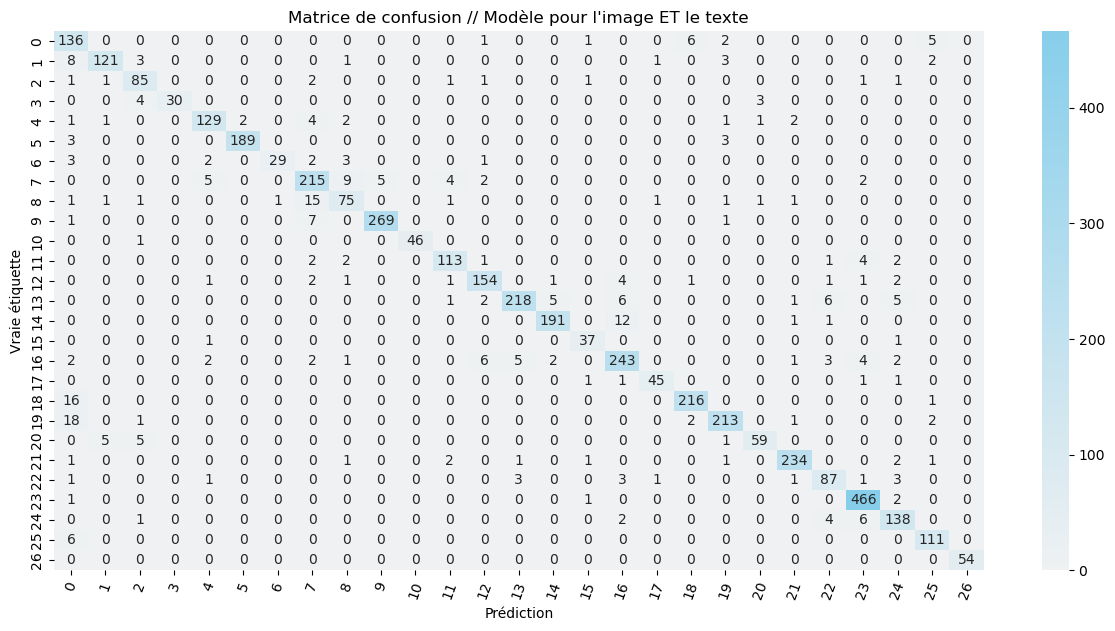

In [14]:
ima_tex_cf = confusion_matrix(df_predictions['index'], df_predictions['y_tex_ima'])

plt.figure(figsize=(15, 7))
palette_bleu=sns.light_palette("#87CEEB", as_cmap=True)
sns.heatmap(ima_tex_cf, annot=True,  cmap=palette_bleu, fmt = 'd')
plt.title("Matrice de confusion // Modèle pour l'image ET le texte")
plt.xlabel('Prédiction')
plt.xticks(rotation=70)
plt.ylabel('Vraie étiquette')
plt.show()

## Predictions pour le texte et l'image

In [15]:
df_pred_tex_ima = get_classification_report(df_predictions['index'], df_predictions['y_tex_ima'])

In [16]:
df_pred_tex_ima['support']= df_pred_tex_ima['support'].astype('int')

In [17]:
df_pred_tex_ima 

,precision,recall,f1-score,support
0,0.683417,0.900662,0.777143,151
1,0.937984,0.870504,0.902985,139
2,0.841584,0.904255,0.871795,94
3,1.000000,0.810811,0.895522,37
4,0.914894,0.902098,0.908451,143
5,0.989529,0.969231,0.979275,195
6,0.966667,0.725000,0.828571,40
7,0.856574,0.888430,0.872211,242
8,0.789474,0.757576,0.773196,99
9,0.981752,0.967626,0.974638,278


## Visualisation

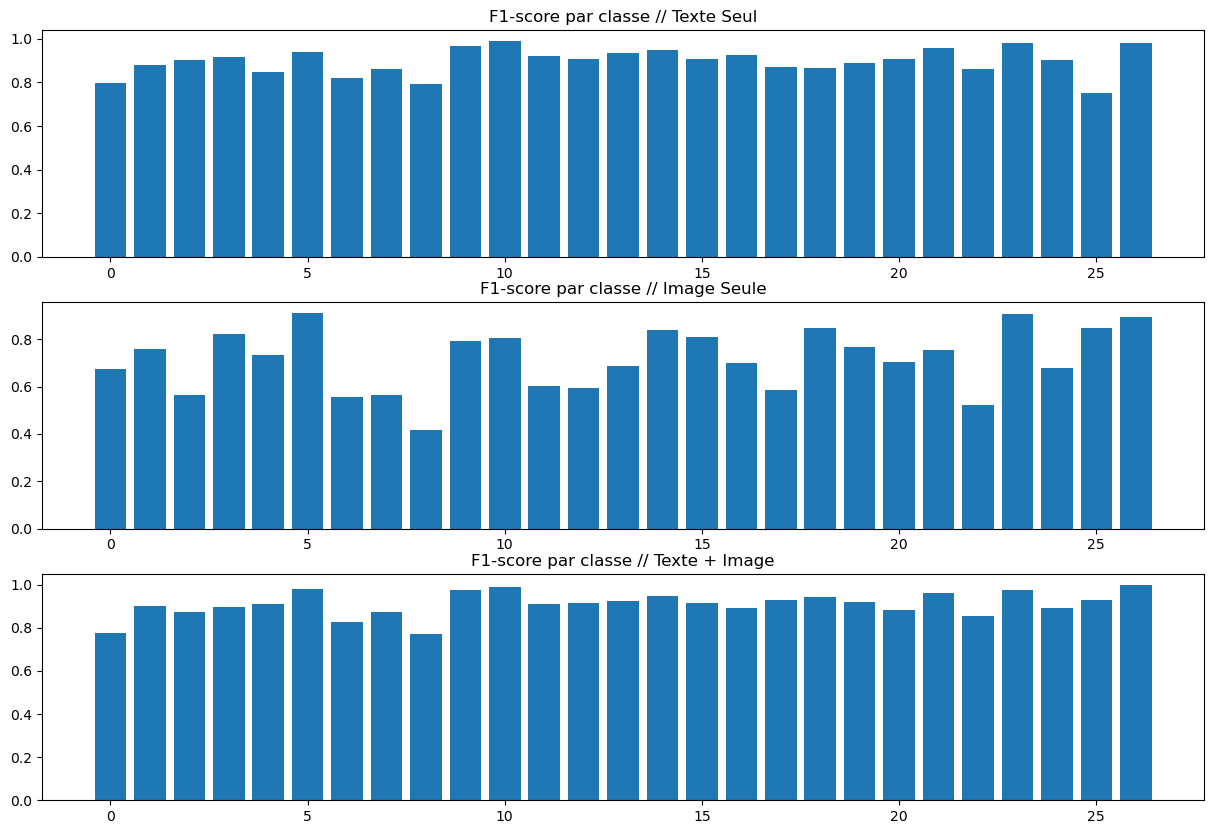

In [20]:
plt.figure(figsize = (15,10))

plt.subplot(311)
plt.bar(range(27), df_pred_tex['f1-score'].iloc[:27])
plt.title("F1-score par classe // Texte Seul")

plt.subplot(312)
plt.bar(range(27), df_pred_ima['f1-score'].iloc[:27])
plt.title("F1-score par classe // Image Seule")

plt.subplot(313)
plt.bar(range(27), df_pred_tex_ima['f1-score'].iloc[:27])
plt.title("F1-score par classe // Texte + Image");


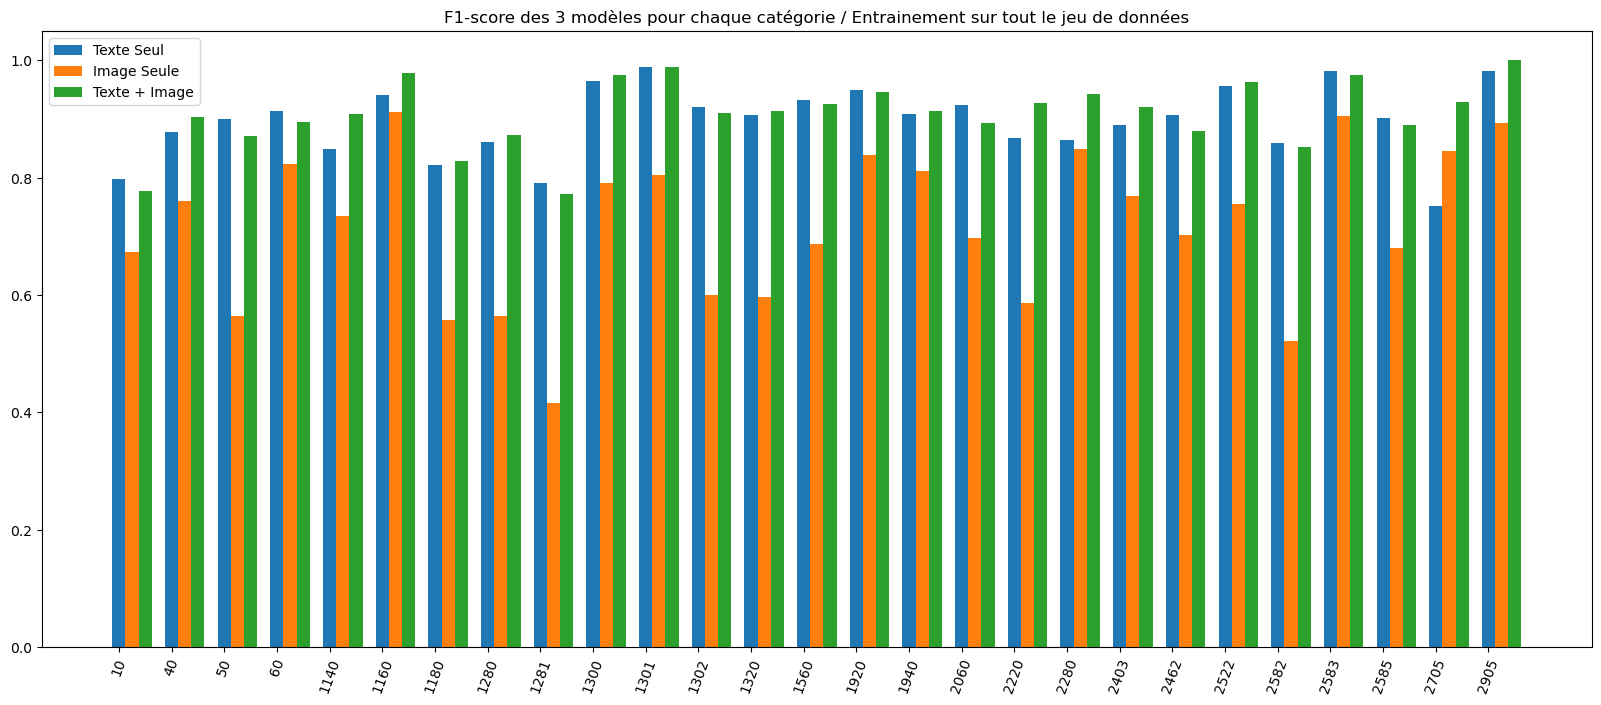

In [24]:
fig = plt.figure(figsize = (20,8))
X = np.arange(27)
plt.bar(X + 0.00, df_pred_tex['f1-score'].iloc[:27], label = "Texte Seul", width = 0.25)
plt.bar(X + 0.25, df_pred_ima['f1-score'].iloc[:27],  label = "Image Seule", width = 0.25)
plt.bar(X + 0.50, df_pred_tex_ima['f1-score'].iloc[:27], label = "Texte + Image", width = 0.25)
plt.xticks(range(27),labels = labels, rotation = 70)
plt.title("F1-score des 3 modèles pour chaque catégorie / Entrainement sur tout le jeu de données")
plt.legend();